API (Application Programming Interface) - Uygulama Programlama Arayüzü ve ENDPOINT Kavramları Nedir?

-Erişim adresleri

openweathermap.org (api)

https://sehirharitasiapi.ibb.gov.tr/developer/ (api)

https://www.tcmb.gov.tr/kurlar/today.xml (Endpoint)

Eren Toraman 28.10.2024

- Endpoint, genellikle bir API (Application Programming Interface) içerisinde belirli bir kaynak veya işlevi temsil eden URL veya URI (Uniform Resource Identifier) olarak tanımlanır. API'ler, uygulamalar arasında veri alışverişi yapılmasına olanak tanırken, endpoint'ler bu verilerin erişildiği, gönderildiği veya alındığı noktaları belirtir.

- Kullanım Alanları
Web Servisleri: RESTful API'lerde, endpoint'ler genellikle belirli bir veri kaynağına veya işlevselliğe erişim sağlar. Örneğin, GET /api/users endpoint'i tüm kullanıcıların listesini almak için kullanılabilir.

- Mobil Uygulamalar: Mobil uygulamalar, arka planda çalışan API'lerle etkileşime girmek için endpoint'leri kullanır. Örneğin, bir sosyal medya uygulaması, kullanıcı bilgilerini almak için bir endpoint kullanabilir.

- IoT Cihazları: Internet of Things (IoT) cihazları, bulut hizmetleriyle iletişim kurmak için endpoint'leri kullanarak veri gönderir veya alır. Örneğin, bir akıllı termostat, sıcaklık verilerini göndermek için bir endpoint'e erişebilir.

- Veri Analizi: Veri analitiği araçları, çeşitli kaynaklardan veri çekmek için API endpoint'lerini kullanır. Örneğin, bir analiz aracı, bir veri havuzundaki verileri almak için belirli bir endpoint'e istek gönderir.

- Oyun Geliştirme: Oyunlar, kullanıcı verilerini veya oyun içi ögeleri yönetmek için backend API endpoint'lerini kullanabilir. Örneğin, oyuncu istatistiklerini güncellemek için bir endpoint kullanılabilir.

- Örnekler
- Kullanıcı Kaydı: POST /api/register — Yeni bir kullanıcı kaydetmek için.
- Ürün Listesi: GET /api/products — Tüm ürünlerin listesini almak için.
- Sipariş Oluşturma: POST /api/orders — Yeni bir sipariş oluşturmak için.
- Kullanıcı Bilgisi: GET /api/users/{id} — Belirli bir kullanıcının bilgilerini almak için.

Bu örnekler, endpoint'lerin nasıl kullanılabileceğine dair temel bir anlayış sağlar. Her endpoint, belirli bir işlemi gerçekleştirmek için tasarlanmıştır ve genellikle belirli HTTP metodlarıyla (GET, POST, PUT, DELETE vb.) ilişkilidir.

In [1]:
import sys # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod blogudur.
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [2]:
from google.colab import drive # google colab - drive bağlantısı

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

os.chdir('/content/drive/My Drive/YapayZeka')

!pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.

/content/drive/My Drive/YapayZeka


In [5]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

from urllib.request import urlopen
from bs4 import BeautifulSoup

link_bilgisi = "https://www.tcmb.gov.tr/kurlar/today.xml"
gelen_yanit = requests.get(url=link_bilgisi)

print(gelen_yanit.text)

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="25.10.2024" Date="10/25/2024"  Bulten_No="2024/203" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>34.1890</ForexBuying>
			<ForexSelling>34.2506</ForexSelling>
			<BanknoteBuying>34.1650</BanknoteBuying>
			<BanknoteSelling>34.3019</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>22.6123</ForexBuying>
			<ForexSelling>22.7597</ForexSelling>
			<BanknoteBuying>22.5082</BanknoteBuying>
			<BanknoteSelling>22.8963</BanknoteSelling>
				<CrossRateUSD>1.5084</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit

In [14]:
tree = ET.parse(urlopen(link_bilgisi))

root = tree.getroot()

liste = []

liste.append(root.findall('Currency'))

In [7]:
for i in liste[0]:
  currencyCode = i.get('Kod')
  banknoteBuying = i.find("BanknoteSelling").text
  banknoteSelling = i.find("BanknoteBuying").text

  if currencyCode == "USD":
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("USD Banka Alış Satış Arasındaki Kur Farkı ->", result)

  if currencyCode == "EUR":
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("EUR Banka Alış Satış Arasındaki Kur Farkı ->", result)

USD 34.3019 34.1650
USD Banka Alış Satış Arasındaki Kur Farkı -> 0.13690000000000424
EUR 37.1216 36.9734
EUR Banka Alış Satış Arasındaki Kur Farkı -> 0.14820000000000277


<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="25.10.2024" Date="10/25/2024"  Bulten_No="2024/203" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>34.1890</ForexBuying>
			<ForexSelling>34.2506</ForexSelling>
			<BanknoteBuying>34.1650</BanknoteBuying>
			<BanknoteSelling>34.3019</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>22.6123</ForexBuying>
			<ForexSelling>22.7597</ForexSelling>
			<BanknoteBuying>22.5082</BanknoteBuying>
			<BanknoteSelling>22.8963</BanknoteSelling>
				<CrossRateUSD>1.5084</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit

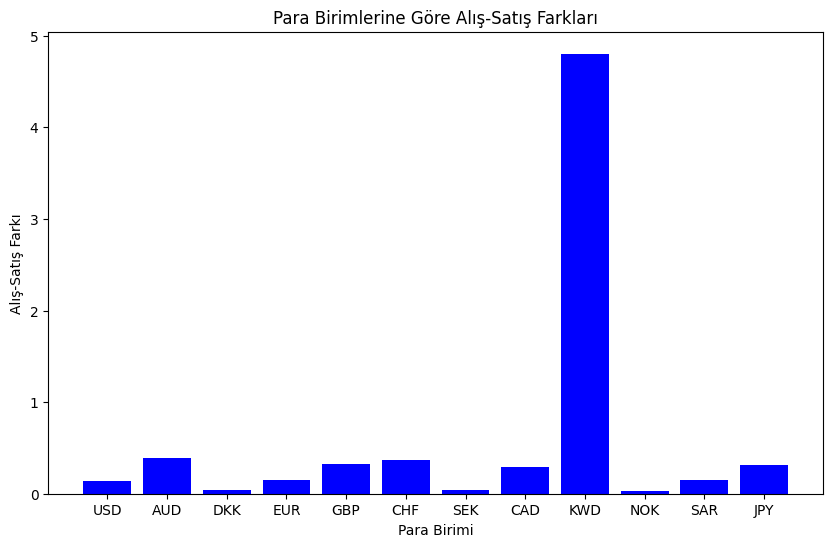

In [8]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

baglanti_adresi = "https://www.tcmb.gov.tr/kurlar/today.xml"

gelen_veri = requests.get(url=baglanti_adresi)
print(gelen_veri.text)

agac = ET.parse(urlopen(baglanti_adresi))
kok = agac.getroot()

para_birimleri = []

para_birimleri.append(kok.findall('Currency'))

for i in para_birimleri[0]:
    paraBirimiKodu = i.get('Kod')
    alisFiyati = i.find("BanknoteSelling").text
    satisFiyati = i.find("BanknoteBuying").text

    if paraBirimiKodu == "USD":
        print(paraBirimiKodu, alisFiyati, satisFiyati)
        fark = float(alisFiyati) - float(satisFiyati)
        print("USD Banka Alış Satış Arasındaki Kur Farkı ->", fark)

    if paraBirimiKodu == "EUR":
        print(paraBirimiKodu, alisFiyati, satisFiyati)
        fark = float(alisFiyati) - float(satisFiyati)
        print("EUR Banka Alış Satış Arasındaki Kur Farkı ->", fark)

veri = {
    'Para Birimi': [],
    'Alış Fiyatı': [],
    'Satış Fiyatı': [],
    'Fark': []
}

for i in para_birimleri[0]:
    paraBirimiKodu = i.get('Kod')
    alisFiyati = i.find("BanknoteSelling").text
    satisFiyati = i.find("BanknoteBuying").text
    if alisFiyati is not None and satisFiyati is not None:
        fark = float(alisFiyati) - float(satisFiyati)
        veri['Para Birimi'].append(paraBirimiKodu)
        veri['Alış Fiyatı'].append(float(alisFiyati))
        veri['Satış Fiyatı'].append(float(satisFiyati))
        veri['Fark'].append(fark)

df = pd.DataFrame(veri)

plt.figure(figsize=(10, 6))
plt.bar(df['Para Birimi'], df['Fark'], color='blue')
plt.xlabel('Para Birimi')
plt.ylabel('Alış-Satış Farkı')
plt.title('Para Birimlerine Göre Alış-Satış Farkları')
plt.show()

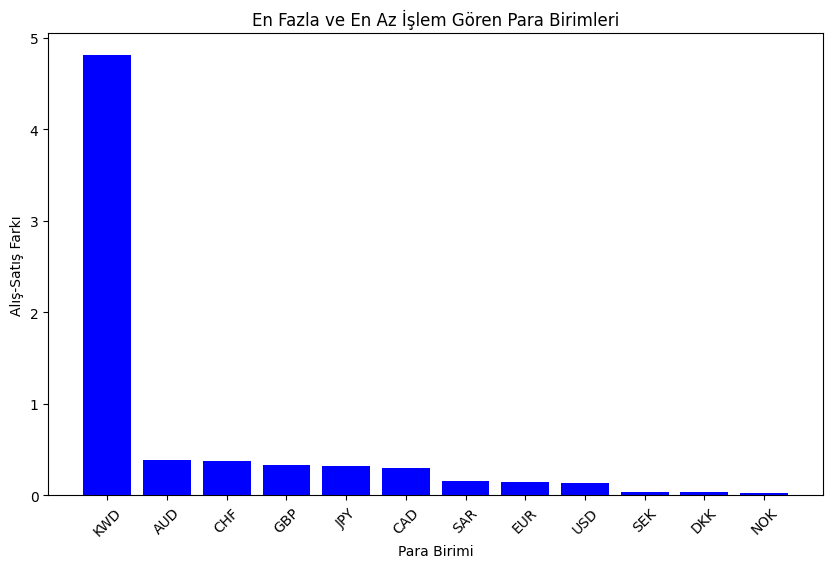

In [9]:
df_sorted = df.sort_values(by='Fark', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Para Birimi'], df_sorted['Fark'], color='blue')
plt.xlabel('Para Birimi')
plt.ylabel('Alış-Satış Farkı')
plt.title('En Fazla ve En Az İşlem Gören Para Birimleri')
plt.xticks(rotation=45)
plt.show()

In [10]:
# CSV dosyasına kaydetme
df_sorted.to_csv('kur_verileri_siralama.csv', index=False)

print("Veriler 'kur_verileri_siralama.csv' dosyasına kaydedildi.")

Veriler 'kur_verileri_siralama.csv' dosyasına kaydedildi.


- API Kurgusu: API (Application Programming Interface), farklı yazılımların birbirleriyle iletişim kurmasını sağlayan bir arayüzdür. API'ler, belirli işlevlerin veya verilerin diğer uygulamalar tarafından kullanılmasına olanak tanır, böylece yazılımlar arasında veri alışverişi ve entegrasyon sağlanır.

- Kullanım Alanları
Web Uygulamaları: Web tabanlı uygulamalar, kullanıcı arayüzü ile sunucu arasında veri iletimi yapmak için API'leri kullanır. Örneğin, bir hava durumu uygulaması, hava durumu verilerini almak için bir hava durumu API'sine istek yapar.

- Mobil Uygulamalar: Mobil uygulamalar, kullanıcı verilerini ve içerikleri almak veya güncellemek için API'leri kullanır. Örneğin, bir sosyal medya uygulaması, kullanıcı profili bilgilerini ve paylaşımları görüntülemek için API'leri kullanabilir.

- Üçüncü Taraf Entegrasyonları: Birçok hizmet, başka uygulamalarla entegre olmak için API sağlar. Örneğin, bir ödeme işleme hizmeti, e-ticaret siteleriyle entegre olmak için bir API sunar.

- IoT (Nesnelerin İnterneti): IoT cihazları, bulut tabanlı hizmetlerle iletişim kurmak için API'leri kullanarak veri gönderir ve alır. Örneğin, bir akıllı ev cihazı, merkezi bir kontrol sistemiyle bağlantı kurmak için API kullanabilir.

- Veri Analizi: Veri analitiği ve iş zekası araçları, veri kaynaklarına erişim sağlamak için API'leri kullanarak verileri toplar ve analiz eder. Örneğin, bir analiz aracı, veri tabanından belirli verileri çekmek için bir API isteği yapabilir.

- Örnekler
Google Maps API: Harita verilerini ve yönlendirme hizmetlerini sağlayarak, geliştiricilerin uygulamalarına harita işlevselliği eklemesine olanak tanır.

Twitter API: Kullanıcıların tweet atmasını, tweetleri almasını ve Twitter ile ilgili diğer işlemleri yapmasını sağlar.

Stripe API: Ödeme işlemleri gerçekleştirmek için kullanılır. E-ticaret siteleri, ürün satışlarını yönetmek için bu API'yi entegre eder.

Spotify API: Müzik verilerine erişim sağlar. Geliştiriciler, müzik arama, çalma listesi oluşturma gibi işlemler için bu API'yi kullanabilir.

API'ler, yazılım geliştirmeyi daha verimli hale getirir ve geliştiricilere çeşitli işlevleri hızlı bir şekilde entegre etme imkanı sunar.



- API Nedir?
- Tanım: API, iki farklı yazılım sisteminin birbirleriyle iletişim kurmasını sağlayan bir arayüzdür. Belirli işlevleri veya verileri başka bir uygulama tarafından kullanılabilir hale getirir.
- Kapsam: API, birçok endpoint içerebilir ve farklı işlevleri gerçekleştirmek için çeşitli metodlar (GET, POST, PUT, DELETE vb.) sunar.
Örnek: Bir sosyal medya platformunun API'si, kullanıcı bilgilerini alma, gönderi oluşturma, yorum yapma gibi birçok işlemi gerçekleştirmek için gerekli tüm işlevleri içerir.
- Endpoint Nedir?
- Tanım: Endpoint, bir API'nin belirli bir kaynağı veya işlevselliği temsil eden URL veya URI'dir. Genellikle bir API içindeki belirli bir işlem veya veri kaynağına erişim sağlamak için kullanılır.
Kapsam: Her endpoint, belirli bir işlevi veya veriyi temsil eder ve genellikle tek bir HTTP isteğiyle erişilir.
Örnek: GET /api/users endpoint'i, kullanıcı listesini almak için kullanılırken; POST /api/users endpoint'i, yeni bir kullanıcı kaydetmek için kullanılır.
- Temel Farklar
-Kapsam:

- API: Genel bir arayüzdür ve birçok endpoint'i içerebilir.
- Endpoint: API içinde belirli bir noktadır ve tek bir işlevi temsil eder.
- Amaç:

- API: Farklı uygulamalar arasında veri alışverişini ve etkileşimi sağlamak için tasarlanmıştır.
- Endpoint: Belirli bir veriye veya işlevselliğe erişimi sağlar.
İletişim:

- API: Genel bir iletişim mekanizmasıdır, kullanıcılar API aracılığıyla çeşitli istekler yapar.
- Endpoint: Her bir istek, belirli bir endpoint aracılığıyla yönlendirilir.

Kısacası, API genel bir iletişim arayüzü iken, endpoint, bu arayüz içindeki belirli bir nokta veya kaynak olarak tanımlanabilir.

In [22]:
# OpenWeather API ->
import requests

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()

        hava_durumu = response.json()

        print(f"Hava Durumu Bilgisi - {sehir}")
        print(f"Sıcaklık: {hava_durumu['main']['temp']} °C")
        print(f"Nem Oranı: {hava_durumu['main']['humidity']}%")
        print(f"Açıklama: {hava_durumu['weather'][0]['description']}")

    except requests.exceptions.RequestException as err:
        print(f"Hata oluştu: {err}")

if __name__ == "__main__":
    sehir_adı = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    api_key = input("OpenWeatherMap API anahtarınızı girin: ")

    hava_durumu_bilgisi_al(sehir_adı, api_key)

Hava durumu bilgisini almak istediğiniz şehir adını girin: istanbul
OpenWeatherMap API anahtarınızı girin: 2a6ef3eedcc5f0a6c3cbdb6a6623e13e
Hata oluştu: 401 Client Error: Unauthorized for url: https://api.openweathermap.org/data/2.5/weather?q=istanbul&appid=2a6ef3eedcc5f0a6c3cbdb6a6623e13e&units=metric


In [21]:
import requests
import matplotlib.pyplot as plt

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()

        hava_durumu = response.json()

        print(f"Hava Durumu Bilgisi - {sehir}")
        print(f"Sıcaklık: {hava_durumu['main']['temp']} °C")
        print(f"Nem Oranı: {hava_durumu['main']['humidity']}%")
        print(f"Açıklama: {hava_durumu['weather'][0]['description']}")

        veri = {
            "Sıcaklık (°C)": hava_durumu['main']['temp'],
            "Nem Oranı (%)": hava_durumu['main']['humidity']
        }

        plt.figure(figsize=(12, 10))

        plt.subplot(2, 2, 1)
        plt.bar(veri.keys(), veri.values(), color=['blue', 'green'])
        plt.xlabel('Hava Durumu Özellikleri')
        plt.ylabel('Değerler')
        plt.title(f'{sehir} İçin Hava Durumu Bilgileri (Bar Grafiği)')

        plt.subplot(2, 2, 2)
        plt.pie(veri.values(), labels=veri.keys(), autopct='%1.1f%%', colors=['blue', 'green'])
        plt.title(f'{sehir} İçin Hava Durumu Bilgileri (Daire Grafiği)')

        plt.subplot(2, 2, 3)
        plt.scatter(['Sıcaklık (°C)'], [veri['Sıcaklık (°C)']], color='red', s=100, label='Sıcaklık (°C)')
        plt.scatter(['Nem Oranı (%)'], [veri['Nem Oranı (%)']], color='blue', s=100, label='Nem Oranı (%)')
        plt.xlabel('Hava Durumu Özellikleri')
        plt.ylabel('Değerler')
        plt.title(f'{sehir} İçin Hava Durumu Bilgileri (Scatter Plot)')
        plt.legend()

        plt.subplot(2, 2, 4)
        plt.hist([veri['Sıcaklık (°C)']], bins=2, color='red', label='Sıcaklık (°C)')
        plt.hist([veri['Nem Oranı (%)']], bins=2, color='blue', label='Nem Oranı (%)', alpha=0.7)
        plt.xlabel('Değerler')
        plt.ylabel('Frekans')
        plt.title(f'{sehir} İçin Hava Durumu Bilgileri (Histogram)')
        plt.legend()

        plt.tight_layout()
        plt.show()

    except requests.exceptions.RequestException as err:
        print(f"Hata oluştu: {err}")

if __name__ == "__main__":
    sehir_adı = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    api_key = input("OpenWeatherMap API anahtarınızı girin: ")

    hava_durumu_bilgisi_al(sehir_adı, api_key)

Hava durumu bilgisini almak istediğiniz şehir adını girin: istanbul
OpenWeatherMap API anahtarınızı girin: fe5143d6811b93a9a49934bab60885f5
Hata oluştu: 401 Client Error: Unauthorized for url: https://api.openweathermap.org/data/2.5/weather?q=istanbul&appid=fe5143d6811b93a9a49934bab60885f5&units=metric
